In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [16]:
# Load Titanic dataset 
df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/Titanic_rows.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Class, Sex, Age, Survived]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [17]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Empty DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


0    1490
1     711
Name: Survived_Yes, dtype: int64


,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,0,1,0,1,1,0
1,0,1,0,1,1,0
2,0,1,0,1,1,0
3,0,1,0,1,1,0
4,0,1,0,1,1,0


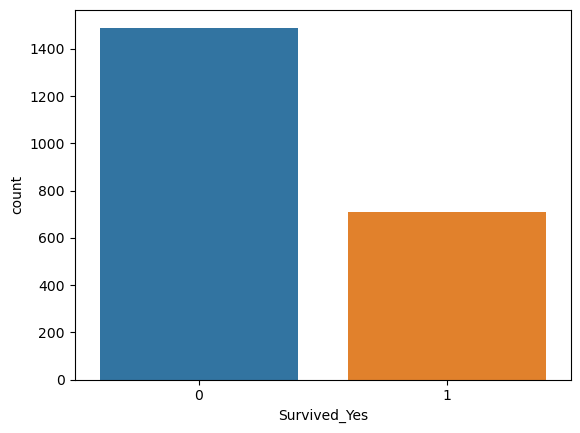

In [18]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['Survived_Yes'].value_counts())
sns.countplot(data=df_obj, x='Survived_Yes')
df_obj.head()

In [20]:
attr = df_obj.drop('Survived_Yes', axis=1)
target = df_obj['Survived_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)

In [22]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.7700453857791225  

 Confusion Matrix:
[[439   6]
 [146  70]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       445
           1       0.92      0.32      0.48       216

    accuracy                           0.77       661
   macro avg       0.84      0.66      0.67       661
weighted avg       0.81      0.77      0.73       661



In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);